## Import iniciais necessários

In [62]:
import requests
import matplotlib.pyplot as plt
import numpy as np

## Dados para acessar a API

In [6]:
api_key = "RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5"
match_id = "BR1_2977976746"
api_url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline?api_key={api_key}"

In [7]:
resp = requests.get(api_url)

In [8]:
game_frames = resp.json()

## Considerações gerais:
*   meu id id na partida era "7"
*   Info contém todos as informações do game
*   frames pega a posição exata de onde o champion estava em um determinado momento
*   1 porque eu peguei somente 1 dos 35 frames na primeira iteração, depois eu fiz um looping


In [10]:
game_frames['info']['frames'][1]["participantFrames"]['7']

{'championStats': {'abilityHaste': 0,
  'abilityPower': 0,
  'armor': 32,
  'armorPen': 0,
  'armorPenPercent': 0,
  'attackDamage': 77,
  'attackSpeed': 100,
  'bonusArmorPenPercent': 0,
  'bonusMagicPenPercent': 0,
  'ccReduction': 0,
  'cooldownReduction': 0,
  'health': 635,
  'healthMax': 635,
  'healthRegen': 14,
  'lifesteal': 0,
  'magicPen': 0,
  'magicPenPercent': 0,
  'magicResist': 32,
  'movementSpeed': 348,
  'omnivamp': 0,
  'physicalVamp': 0,
  'power': 280,
  'powerMax': 280,
  'powerRegen': 14,
  'spellVamp': 0},
 'currentGold': 0,
 'damageStats': {'magicDamageDone': 0,
  'magicDamageDoneToChampions': 0,
  'magicDamageTaken': 0,
  'physicalDamageDone': 0,
  'physicalDamageDoneToChampions': 0,
  'physicalDamageTaken': 0,
  'totalDamageDone': 0,
  'totalDamageDoneToChampions': 0,
  'totalDamageTaken': 0,
  'trueDamageDone': 0,
  'trueDamageDoneToChampions': 0,
  'trueDamageTaken': 0},
 'goldPerSecond': 0,
 'jungleMinionsKilled': 0,
 'level': 1,
 'minionsKilled': 0,
 'pa

In [11]:
list_pos = []

contador = 0
while contador < 35:
    
    list_pos.append(game_frames['info']['frames'][contador]["participantFrames"]['7']['position'])
    
    
    contador = contador + 1

In [12]:
print(list_pos)

[{'x': 14539, 'y': 14394}, {'x': 6155, 'y': 10026}, {'x': 6371, 'y': 12370}, {'x': 11300, 'y': 7064}, {'x': 6453, 'y': 9150}, {'x': 6077, 'y': 12509}, {'x': 3463, 'y': 8013}, {'x': 7261, 'y': 11052}, {'x': 10398, 'y': 5478}, {'x': 12140, 'y': 8968}, {'x': 9952, 'y': 4478}, {'x': 7137, 'y': 7021}, {'x': 3145, 'y': 11153}, {'x': 6486, 'y': 12372}, {'x': 10859, 'y': 8664}, {'x': 10555, 'y': 5180}, {'x': 4750, 'y': 10063}, {'x': 2403, 'y': 8450}, {'x': 7028, 'y': 7783}, {'x': 12362, 'y': 6288}, {'x': 7325, 'y': 11016}, {'x': 13475, 'y': 6515}, {'x': 6111, 'y': 6274}, {'x': 3777, 'y': 6474}, {'x': 10924, 'y': 6403}, {'x': 8547, 'y': 8196}, {'x': 3958, 'y': 8593}, {'x': 13584, 'y': 6742}, {'x': 13594, 'y': 7182}, {'x': 10144, 'y': 4648}, {'x': 4436, 'y': 13368}, {'x': 7971, 'y': 9577}, {'x': 14340, 'y': 14391}, {'x': 12879, 'y': 4260}, {'x': 7762, 'y': 1027}]


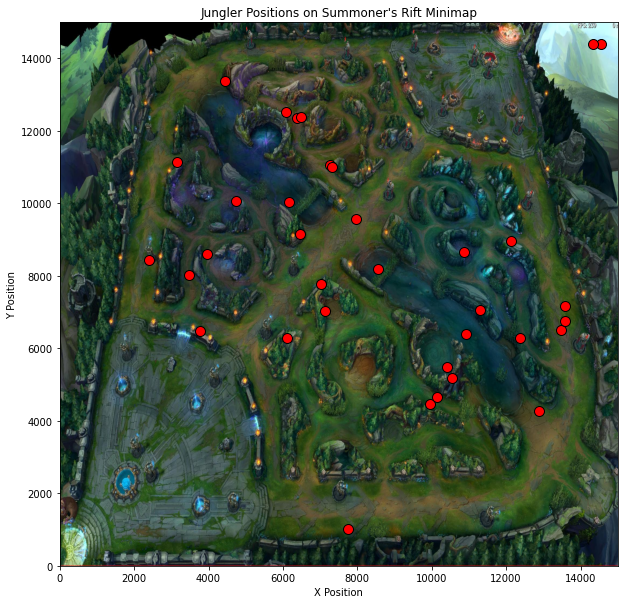

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Provided list of jungler positions
positions = [
    {'x': 14539, 'y': 14394}, {'x': 6155, 'y': 10026}, {'x': 6371, 'y': 12370}, {'x': 11300, 'y': 7064},
    {'x': 6453, 'y': 9150}, {'x': 6077, 'y': 12509}, {'x': 3463, 'y': 8013}, {'x': 7261, 'y': 11052},
    {'x': 10398, 'y': 5478}, {'x': 12140, 'y': 8968}, {'x': 9952, 'y': 4478}, {'x': 7137, 'y': 7021},
    {'x': 3145, 'y': 11153}, {'x': 6486, 'y': 12372}, {'x': 10859, 'y': 8664}, {'x': 10555, 'y': 5180},
    {'x': 4750, 'y': 10063}, {'x': 2403, 'y': 8450}, {'x': 7028, 'y': 7783}, {'x': 12362, 'y': 6288},
    {'x': 7325, 'y': 11016}, {'x': 13475, 'y': 6515}, {'x': 6111, 'y': 6274}, {'x': 3777, 'y': 6474},
    {'x': 10924, 'y': 6403}, {'x': 8547, 'y': 8196}, {'x': 3958, 'y': 8593}, {'x': 13584, 'y': 6742},
    {'x': 13594, 'y': 7182}, {'x': 10144, 'y': 4648}, {'x': 4436, 'y': 13368}, {'x': 7971, 'y': 9577},
    {'x': 14340, 'y': 14391}, {'x': 12879, 'y': 4260}, {'x': 7762, 'y': 1027}
]

# Convert list of dictionaries to numpy array
positions_array = np.array([[pos['x'], pos['y']] for pos in positions])

# Load the Summoner's Rift minimap image
minimap_image_path = 'D:\\Furia2\\real_summoners.jpeg'
minimap_img = mpimg.imread(minimap_image_path)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Display the minimap image
ax.imshow(minimap_img, extent=[0, 15000, 0, 15000], aspect='auto')

# Plot the jungler positions if any
if positions_array.size > 0:
    x, y = positions_array[:, 0], positions_array[:, 1]
    ax.scatter(x, y, c='red', s=100, edgecolors='black')

# Set the axis limits to match the minimap
ax.set_xlim(0, 15000)
ax.set_ylim(0, 15000)

# Set labels
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Jungler Positions on Summoner\'s Rift Minimap')

plt.show()

## Pegar mais de um jogo por "puuid"

In [20]:
puuid = "80mmXY7Jj9-Jfp9LBj4Y5ypcy4n0_YPgOKGfdlePenIlFn5Z6iIlJCDIs_Cno78blfRLWiFj6WGQ5g"

In [24]:
api_url_puuid = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-puuid/{puuid}?api_key={api_key}"

In [25]:
player_info = requests.get(api_url_puuid)

In [26]:
player_info = player_info.json()

In [27]:
player_info

{'puuid': '80mmXY7Jj9-Jfp9LBj4Y5ypcy4n0_YPgOKGfdlePenIlFn5Z6iIlJCDIs_Cno78blfRLWiFj6WGQ5g',
 'gameName': 'zGodEaterZ',
 'tagLine': 'BR1'}

In [28]:
player_info["gameName"]

'zGodEaterZ'

In [30]:
player_info_puuid = player_info['puuid']
print(player_info_puuid)

80mmXY7Jj9-Jfp9LBj4Y5ypcy4n0_YPgOKGfdlePenIlFn5Z6iIlJCDIs_Cno78blfRLWiFj6WGQ5g


In [31]:
matches_api_url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{player_info_puuid}/ids?start=0&count=20&api_key={api_key}"

In [39]:
matches = requests.get(matches_api_url)

In [40]:
matches = matches.json()
print(matches)

['BR1_2980514593', 'BR1_2977976746', 'BR1_2977969657', 'BR1_2977798008', 'BR1_2977772921', 'BR1_2977748548', 'BR1_2976429902', 'BR1_2976399057', 'BR1_2976367091', 'BR1_2976213836', 'BR1_2976201074', 'BR1_2976004648', 'BR1_2975967951', 'BR1_2975947269', 'BR1_2975816812', 'BR1_2975707407', 'BR1_2975658707', 'BR1_2975615861', 'BR1_2975248980', 'BR1_2974834807']


In [44]:
match = matches[0]
print(match)

BR1_2980514593


## Iteração com mais de um match_id

In [45]:
### Agora vou pegar mais de um "match_id"
print(type(matches))

<class 'list'>


In [46]:
## lista de match_id:


lista_match_id = matches

In [47]:
lista_api_url = []

for matches_id in lista_match_id:
    #print(matches_id)
    api_url_lista = f"https://americas.api.riotgames.com/lol/match/v5/matches/{matches_id}/timeline?api_key={api_key}"
    
    lista_api_url.append(api_url_lista)
    

In [48]:
lista_api_url

['https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2980514593/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2977976746/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2977969657/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2977798008/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2977772921/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2977748548/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2976429902/timeline?api_key=RGAPI-3d160029-062f-4fcd-99cf-796a42af4af5',
 'https://americas.api.riotgames.com/lol/match/v5/match

In [51]:
list_requests = []

for api_urls in lista_api_url:
    resps = requests.get(api_urls)
    
    list_requests.append(resps.json())

In [52]:
list_requests[1]

{'metadata': {'dataVersion': '2',
  'matchId': 'BR1_2977976746',
  'participants': ['Tq38ZjHj0JDd1MR6ZCm9xsDV6qmSAvOE6ZCIPbfmt5XXjfzaNJwVS0jGs9TLDfuizI8K8aof9FY7tQ',
   'Tm8IksoY-nHdu-szBTG0YZY7jdM20TCMZLBux2uGeOite27P2XQ6OYgSvNgzFGSgxbdxNjmR1JCnlw',
   'Ey-4ILjVdaxmPGSBaYb7LgzLpE147fG04yg1JqQHwPaSVsA9JxRe4I2fvfQPJY7UtLi6To7tv4DFNg',
   'jVg3cKcDVyxM3ZfyBHTJ1TVKtZHjVgqYYwTi-vdBmgCTHr2GNCVzrjmMIoKkoBsuND2zXsGYJJit_Q',
   'gvxhSWrxbkqShaWXVX3CPX93Tdezsy_P814KjkK2B9jEiigRZPurCRGm7EIcscFKkyS6wi0_1Xhr2g',
   'zYMpyVjL5R-GzfPPyFZhya9qIknUJx4_dU_crefwMbBRyAuJ6FHhM3aNKukDgPJeCyQ7NaxJenuvKg',
   '80mmXY7Jj9-Jfp9LBj4Y5ypcy4n0_YPgOKGfdlePenIlFn5Z6iIlJCDIs_Cno78blfRLWiFj6WGQ5g',
   'p7hSCj926yAjoAVXpx2uPXaIl3_-kz7K2C3SYUlOB1bqyM1YOJgoM-DYOegpcxRVR8_0963JpDGFXQ',
   'qmmbdhhyiEj3MSxzWESQ5HSWy7ZdJV-K7-Keh6zSuvF1_w5lmJK4_1FStiGKMHDwgMxhsgcGSGOGBg',
   'n0CJDuuNzI2TqZIJOSMFw1vd2N5E_6wfFtA9FH4Vl5OOTHbdN4qNt6espQDysWWAv3TbsJ32ts_TjA']},
 'info': {'endOfGameResult': 'GameComplete',
  'frameInterval': 600

In [53]:
list_requests[0]['info']['frames'][1]["participantFrames"]['7']

{'championStats': {'abilityHaste': 0,
  'abilityPower': 9,
  'armor': 30,
  'armorPen': 0,
  'armorPenPercent': 0,
  'attackDamage': 55,
  'attackSpeed': 110,
  'bonusArmorPenPercent': 0,
  'bonusMagicPenPercent': 0,
  'ccReduction': 0,
  'cooldownReduction': 0,
  'health': 660,
  'healthMax': 660,
  'healthRegen': 11,
  'lifesteal': 0,
  'magicPen': 0,
  'magicPenPercent': 0,
  'magicResist': 30,
  'movementSpeed': 330,
  'omnivamp': 0,
  'physicalVamp': 0,
  'power': 324,
  'powerMax': 324,
  'powerRegen': 12,
  'spellVamp': 0},
 'currentGold': 60,
 'damageStats': {'magicDamageDone': 0,
  'magicDamageDoneToChampions': 0,
  'magicDamageTaken': 0,
  'physicalDamageDone': 2,
  'physicalDamageDoneToChampions': 0,
  'physicalDamageTaken': 0,
  'totalDamageDone': 2,
  'totalDamageDoneToChampions': 0,
  'totalDamageTaken': 0,
  'trueDamageDone': 0,
  'trueDamageDoneToChampions': 0,
  'trueDamageTaken': 0},
 'goldPerSecond': 0,
 'jungleMinionsKilled': 0,
 'level': 1,
 'minionsKilled': 1,
 'p

In [54]:
list_requests[0]['info']['frames'][1]["participantFrames"]['7']['championStats']

{'abilityHaste': 0,
 'abilityPower': 9,
 'armor': 30,
 'armorPen': 0,
 'armorPenPercent': 0,
 'attackDamage': 55,
 'attackSpeed': 110,
 'bonusArmorPenPercent': 0,
 'bonusMagicPenPercent': 0,
 'ccReduction': 0,
 'cooldownReduction': 0,
 'health': 660,
 'healthMax': 660,
 'healthRegen': 11,
 'lifesteal': 0,
 'magicPen': 0,
 'magicPenPercent': 0,
 'magicResist': 30,
 'movementSpeed': 330,
 'omnivamp': 0,
 'physicalVamp': 0,
 'power': 324,
 'powerMax': 324,
 'powerRegen': 12,
 'spellVamp': 0}

In [55]:
list_requests[0]['info']['frames'][1]["participantFrames"]['7']

{'championStats': {'abilityHaste': 0,
  'abilityPower': 9,
  'armor': 30,
  'armorPen': 0,
  'armorPenPercent': 0,
  'attackDamage': 55,
  'attackSpeed': 110,
  'bonusArmorPenPercent': 0,
  'bonusMagicPenPercent': 0,
  'ccReduction': 0,
  'cooldownReduction': 0,
  'health': 660,
  'healthMax': 660,
  'healthRegen': 11,
  'lifesteal': 0,
  'magicPen': 0,
  'magicPenPercent': 0,
  'magicResist': 30,
  'movementSpeed': 330,
  'omnivamp': 0,
  'physicalVamp': 0,
  'power': 324,
  'powerMax': 324,
  'powerRegen': 12,
  'spellVamp': 0},
 'currentGold': 60,
 'damageStats': {'magicDamageDone': 0,
  'magicDamageDoneToChampions': 0,
  'magicDamageTaken': 0,
  'physicalDamageDone': 2,
  'physicalDamageDoneToChampions': 0,
  'physicalDamageTaken': 0,
  'totalDamageDone': 2,
  'totalDamageDoneToChampions': 0,
  'totalDamageTaken': 0,
  'trueDamageDone': 0,
  'trueDamageDoneToChampions': 0,
  'trueDamageTaken': 0},
 'goldPerSecond': 0,
 'jungleMinionsKilled': 0,
 'level': 1,
 'minionsKilled': 1,
 'p

In [56]:
list_requests[0]['info']['frames'][1]["participantFrames"]['7']


{'championStats': {'abilityHaste': 0,
  'abilityPower': 9,
  'armor': 30,
  'armorPen': 0,
  'armorPenPercent': 0,
  'attackDamage': 55,
  'attackSpeed': 110,
  'bonusArmorPenPercent': 0,
  'bonusMagicPenPercent': 0,
  'ccReduction': 0,
  'cooldownReduction': 0,
  'health': 660,
  'healthMax': 660,
  'healthRegen': 11,
  'lifesteal': 0,
  'magicPen': 0,
  'magicPenPercent': 0,
  'magicResist': 30,
  'movementSpeed': 330,
  'omnivamp': 0,
  'physicalVamp': 0,
  'power': 324,
  'powerMax': 324,
  'powerRegen': 12,
  'spellVamp': 0},
 'currentGold': 60,
 'damageStats': {'magicDamageDone': 0,
  'magicDamageDoneToChampions': 0,
  'magicDamageTaken': 0,
  'physicalDamageDone': 2,
  'physicalDamageDoneToChampions': 0,
  'physicalDamageTaken': 0,
  'totalDamageDone': 2,
  'totalDamageDoneToChampions': 0,
  'totalDamageTaken': 0,
  'trueDamageDone': 0,
  'trueDamageDoneToChampions': 0,
  'trueDamageTaken': 0},
 'goldPerSecond': 0,
 'jungleMinionsKilled': 0,
 'level': 1,
 'minionsKilled': 1,
 'p

## Jg monster killed x tempo

In [90]:
list_requests[1]['info']['frames'][35]["participantFrames"]['7']['jungleMinionsKilled']

223

In [91]:
jogo_1_jgMinionKill_list = []
jogo_1_tempo_lista = []


contador = 0

while contador < 35:
    
    jungleMinionKill = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['jungleMinionsKilled']
    tempo = list_requests[1]['info']['frames'][contador]['timestamp']/60000
    
    jogo_1_jgMinionKill_list.append(jungleMinionKill)
    jogo_1_tempo_lista.append(tempo)
    
    contador = contador + 1

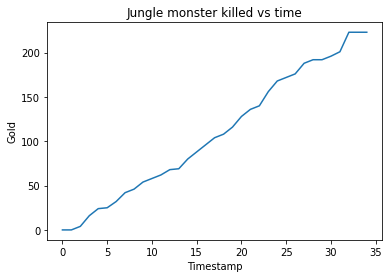

In [99]:
plt.plot(jogo_1_tempo_lista, jogo_1_jgMinionKill_list)
plt.title("Jungle monster killed vs time")
plt.xlabel("Timestamp")
plt.ylabel("Gold")
plt.show()

In [93]:
jogo_1_health_list = []

contador = 0

while contador < 35:
    
    health = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']["championStats"]['health']
    jogo_1_health_list.append(health)
    
    contador = contador + 1

## Health x tempo

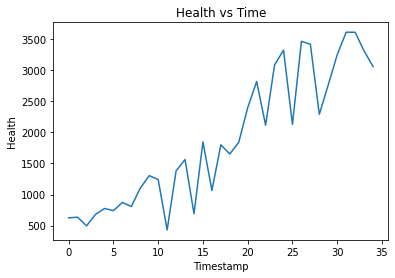

In [98]:
plt.plot(jogo_1_tempo_lista, jogo_1_health_list)
plt.title("Health vs Time")
plt.xlabel("Timestamp")
plt.ylabel("Health")
plt.show()

## Max Health x tempo

In [95]:
jogo_1_health_max_list = []

contador = 0

while contador < 35:
    
    health = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']["championStats"]['healthMax']
    jogo_1_health_max_list.append(health)
    
    contador = contador + 1

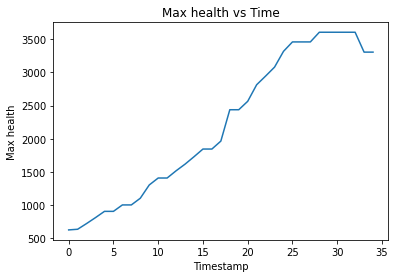

In [97]:
plt.plot(jogo_1_tempo_lista, jogo_1_health_max_list)
plt.title("Max health vs Time")
plt.xlabel("Timestamp")
plt.ylabel("Max health")
plt.show()

In [112]:
list_requests[1]['info']['frames'][3]["participantFrames"]['7']

{'championStats': {'abilityHaste': 0,
  'abilityPower': 0,
  'armor': 45,
  'armorPen': 0,
  'armorPenPercent': 0,
  'attackDamage': 82,
  'attackSpeed': 103,
  'bonusArmorPenPercent': 0,
  'bonusMagicPenPercent': 0,
  'ccReduction': 0,
  'cooldownReduction': 0,
  'health': 680,
  'healthMax': 811,
  'healthRegen': 24,
  'lifesteal': 0,
  'magicPen': 0,
  'magicPenPercent': 0,
  'magicResist': 40,
  'movementSpeed': 348,
  'omnivamp': 0,
  'physicalVamp': 0,
  'power': 118,
  'powerMax': 339,
  'powerRegen': 97,
  'spellVamp': 0},
 'currentGold': 522,
 'damageStats': {'magicDamageDone': 877,
  'magicDamageDoneToChampions': 0,
  'magicDamageTaken': 0,
  'physicalDamageDone': 6328,
  'physicalDamageDoneToChampions': 0,
  'physicalDamageTaken': 2049,
  'totalDamageDone': 11680,
  'totalDamageDoneToChampions': 0,
  'totalDamageTaken': 2049,
  'trueDamageDone': 4473,
  'trueDamageDoneToChampions': 0,
  'trueDamageTaken': 0},
 'goldPerSecond': 0,
 'jungleMinionsKilled': 16,
 'level': 3,
 'mi

## Lifesteal x tempo

In [86]:
jogo_1_life_steal_list = []

contador = 0

while contador < 35:
    
    life_steal = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']["championStats"]['lifesteal']
    jogo_1_life_steal_list.append(life_steal)
    
    contador = contador + 1

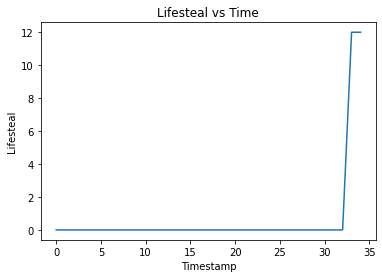

In [89]:
plt.plot(jogo_1_tempo_lista, jogo_1_life_steal_list)
plt.title("Lifesteal vs Time")
plt.xlabel("Timestamp")
plt.ylabel("Lifesteal")
plt.show()

## Total gold x time

In [101]:
totalGold = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['totalGold']

19990

In [104]:
jogo_1_totalGold_list = []

contador = 0

while contador < 35:
    
    totalGold = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['totalGold']
    jogo_1_totalGold_list.append(totalGold)
    
    contador = contador + 1

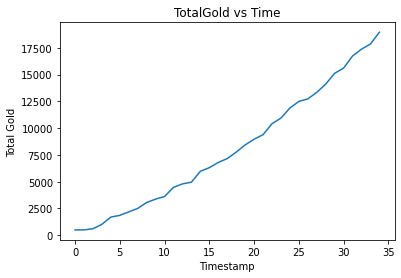

In [106]:
plt.plot(jogo_1_tempo_lista, jogo_1_totalGold_list)
plt.title("TotalGold vs Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Gold")
plt.show()

## Xp x time

In [108]:
xp = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['xp']

In [115]:
jogo_1_xp_list = []

contador = 0

while contador < 35:
    
    xp = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['xp']
    jogo_1_xp_list.append(xp)
    
    contador = contador + 1

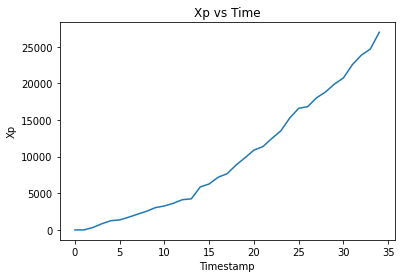

In [117]:
plt.plot(jogo_1_tempo_lista, jogo_1_xp_list)
plt.title("Xp vs Time")
plt.xlabel("Timestamp")
plt.ylabel("Xp")
plt.show()

## Total dmg x time

In [125]:
list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['damageStats']

{'magicDamageDone': 36753,
 'magicDamageDoneToChampions': 4714,
 'magicDamageTaken': 13932,
 'physicalDamageDone': 352665,
 'physicalDamageDoneToChampions': 31056,
 'physicalDamageTaken': 42623,
 'totalDamageDone': 469276,
 'totalDamageDoneToChampions': 37568,
 'totalDamageTaken': 57670,
 'trueDamageDone': 79861,
 'trueDamageDoneToChampions': 1798,
 'trueDamageTaken': 1114}

In [127]:
totaldmg = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['damageStats']['totalDamageDoneToChampions']

In [130]:
jogo_1_totalDamage_list = []

contador = 0

while contador < 35:
    
    totalDmg = list_requests[1]['info']['frames'][contador]["participantFrames"]['7']['damageStats']['totalDamageDoneToChampions']
    jogo_1_totalDamage_list.append(totalDmg)
    
    contador = contador + 1

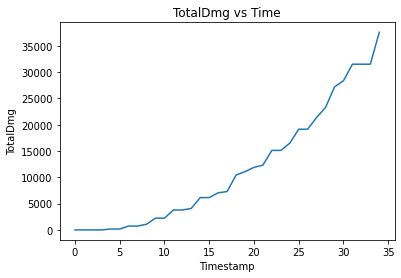

In [133]:
plt.plot(jogo_1_tempo_lista, jogo_1_totalDamage_list)
plt.title("TotalDmg vs Time")
plt.xlabel("Timestamp")
plt.ylabel("TotalDmg")
plt.show()